In [29]:
# Matplotlib config
%matplotlib inline

# SVG-Anzeige anschalten
%config InlineBackend.figure_formats = ['svg']

# Größe definieren
%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return np.nan

df = pd.read_csv("./data/SF-Salaries/Salaries.csv.bz2", 
                 converters = {'BasePay': convert_to_float,
                              'OvertimePay': convert_to_float,
                              'OtherPay': convert_to_float,
                              'Benefits': convert_to_float},
                 dtype = {'Status': str})

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Aufgabe 1:

Visualisiere die Einkommensverteilung (BasePay oder TotalPayBenefits) für das Jahr 2014!

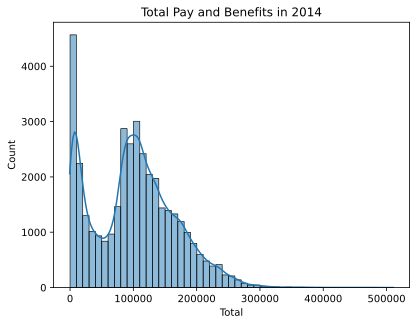

In [31]:
salaries = df[df["Year"] == 2014]

p = sns.histplot(data=salaries, x="TotalPayBenefits", binwidth=10000, binrange=(0, salaries["TotalPayBenefits"].max()), kde=True)
p.set_title("Total Pay and Benefits in 2014")
p.set_xlabel("Total")

plt.show()

## Aufgabe 2

Wir möchten nach San Francisco ziehen. Welchen öffentlichen Job sollten wir annehmen, um möglichst viel zu verdienen?

Der Job muss aber auch "erreichbar" sein für uns, "CAPTAIN III (POLICE DEPARTMENT)" wäre für uns so ohne weiteres vermutlich nicht erreichbar. 

Ermittle also die häufigsten 10 Jobs (gruppiert nach der Spalte `JobTitle`) und plotte zu jedem JobTitle das durchschnittliche Gesamteinkommen (TotalPayBenefits) für das Jahr 2014 in einem Balkendiagramm. Für welchen Job sollten wir uns bewerben?

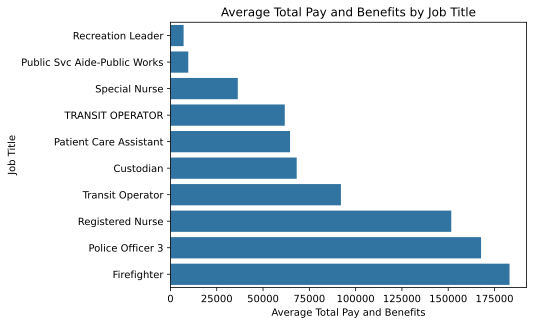

In [32]:
jobs = df.groupby("JobTitle").agg(
    cnt = ('Id', 'count'), 
    avg = ('TotalPayBenefits', 'mean')).reset_index().sort_values(by='cnt', ascending=False).head(10)

jobs.sort_values(by='avg', ascending=True, inplace=True)
p = sns.barplot(data=jobs, x='avg', y='JobTitle')
p.set_title("Average Total Pay and Benefits by Job Title")
p.set_xlabel("Average Total Pay and Benefits")
p.set_ylabel("Job Title")

plt.show()

## Aufgabe 3

a) Erstelle ein Balkendiagram mit verschiedenen Balken:

- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2011
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2012
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2013
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2014

b) Plotte zusätlich zum durchschnittlichen Gesamteinkommen (TotalPayBenefits) das durchschnittliche Grundgehalt "BasePay" pro Jahr. 

In [33]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [34]:
filtered = df[
    (df["Year"] == 2011)
    | (df["Year"] == 2012)
    | (df["Year"] == 2013)
    | (df["Year"] == 2014)
]


In [35]:
filtered = filtered[['Year', 'TotalPayBenefits', 'BasePay']]
filtered.head()

,Year,TotalPayBenefits,BasePay
0,2011,567595.43,167411.18
1,2011,538909.28,155966.02
2,2011,335279.91,212739.13
3,2011,332343.61,77916.00
4,2011,326373.19,134401.60


In [36]:
grouped = (
    filtered.groupby("Year")
    .agg(total=("TotalPayBenefits", "mean"), base=("BasePay", "mean"))
    .reset_index()
    .sort_values(by="Year", ascending=True)
)
grouped

,Year,total,base
0,2011,71744.103871,63595.956517
1,2012,100553.229232,65436.406857
2,2013,101440.519714,69630.030216
3,2014,100250.918884,66564.421924


In [37]:
melted = grouped.melt(id_vars=["Year"], value_vars=["base", "total"], var_name="Type", value_name="Value")
melted.head(10)

,Year,Type,Value
0,2011,base,63595.956517
1,2012,base,65436.406857
2,2013,base,69630.030216
3,2014,base,66564.421924
4,2011,total,71744.103871
5,2012,total,100553.229232
6,2013,total,101440.519714
7,2014,total,100250.918884


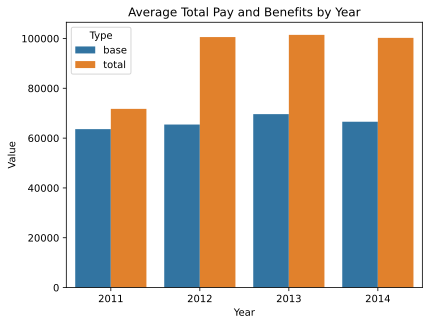

In [38]:
sns.barplot(data=melted, x="Year", y="Value", hue="Type")
plt.title("Average Total Pay and Benefits by Year")

plt.show()